In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tested successfully

In [2]:
data = pd.read_csv("./digit-recognizer/train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [3]:
X_val = (data[:1000, 1:].T)/255.
Y_val = data[:1000, 0]

X_train = (data[1000:, 1:].T)/255.
Y_train = data[1000:, 0]

X_val.shape, Y_val.shape, X_train.shape, Y_train.shape

((784, 1000), (1000,), (784, 41000), (41000,))

In [4]:
class NeuralNetwork:
    def __init__(self, input_shape, layers, num_classes, lr):
        self.input_shape = input_shape
        self.layers = layers
        self.num_classes = num_classes
        self.lr = lr
        self.weights = []
        self.biases = []
        self.init_params()
        
    def forward(self, x):
        A = x
        for i in range(len(self.weights)-1):
            Z = self.weights[i].dot(A) + self.biases[i]
            A = self.ReLU(Z)
        Z = self.weights[-1].dot(A) + self.biases[-1]
        A = self.softmax(Z)
        
        return A
    
    def fit(self, X_train, Y_train, epochs, validation_data): 
        X_val, Y_val = validation_data
        Y_train_ = Y_train
        Y_train = self.oneHotEncoding(Y_train).T

        # Forward pass 
        for epoch in range(epochs):
            A = X_train
            forward_pass = []
            for i in range(len(self.weights)):
                if i == len(self.weights)-1:
                    Z = self.weights[-1].dot(A) + self.biases[-1]
                    A = self.softmax(Z)
                else:
                    Z = self.weights[i].dot(A) + self.biases[i]
                    A = self.ReLU(Z)
                forward_pass.append((Z, A))

            # Backward pass
            layer_backprops = []
            for i in range(len(forward_pass)):
                if i == 0:
                    layer_backprops.insert(0, forward_pass[-1][-1] - Y_train)
                else:
                    layer_backprop = np.multiply(self.weights[len(self.weights)-i].T.dot(layer_backprops[0]), self.ReLU_deriv(forward_pass[len(self.weights)-i-1][0]))
                    layer_backprops.insert(0, layer_backprop)


            forward_pass.insert(0, (0, X_train))
            weight_grads = []
            bias_grads = []
            for i in range(len(layer_backprops)):
                weight_grads += [layer_backprops[i].dot(forward_pass[i][1].T)/X_train.shape[1]]
                bias_grads  += [np.sum(layer_backprops[i], axis=1, keepdims=True)/X_train.shape[1]]


            ### update weights
            for i in range(len(self.weights)):
                self.weights[i] = self.weights[i] - self.lr*weight_grads[i]
                self.biases[i] = self.biases[i] - self.lr*bias_grads[i]
                
            val_preds = model.forward(X_val).argmax(0)
            train_preds = model.forward(X_train).argmax(0)
            print(f'Epoch: {epoch} Train Accuracy: {str(len(train_preds[train_preds==Y_train_])/len(Y_train_))[:4]}  Validation Accuracy: {str(len(val_preds[val_preds==Y_val])/len(Y_val))[:4]}')
             

    def init_params(self):
        self.weights += [np.random.rand(self.layers[0], self.input_shape).astype(np.float64)-0.5]
        self.biases += [np.random.rand(self.layers[0], 1).astype(np.float64)-0.5]
        for i in range(1, len(self.layers)):
            self.weights += [np.random.rand(self.layers[i], self.layers[i-1]).astype(np.float64)-0.5]
            self.biases += [np.random.rand(self.layers[i], 1).astype(np.float64)-0.5]
        self.weights += [np.random.rand(num_classes, self.layers[-1]).astype(np.float64)-0.5]
        self.biases += [np.random.rand(self.num_classes, 1).astype(np.float64) - 0.5]

        
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def softmax(self, Z):
        return np.exp(Z)/sum(np.exp(Z))

    def ReLU_deriv(self, Z):
        return Z > 0
    
    def oneHotEncoding(self, Y):
        labels = np.zeros((Y.size, Y.max()+1))
        labels[np.arange(Y.size), Y] = 1
        return labels
    
    def CELoss(self, y_preds, y_true):
        individual_losses =  -np.sum(y_true*np.log(y_preds), axis=0)
        average_loss = np.sum(individual_losses)/individual_losses.shape[0]
        return average_loss

In [5]:
# Assume input_shape = 784, num_layers = 3, num_neurons = 64, 32, 
input_shape = 784
num_classes = 10
layers = [32, 32]

In [6]:
model = NeuralNetwork(input_shape, layers, num_classes, 0.1)

In [7]:
model.fit(X_train, Y_train, 1000, (X_val, Y_val))

Epoch: 0 Train Accuracy: 0.13  Validation Accuracy: 0.13
Epoch: 1 Train Accuracy: 0.16  Validation Accuracy: 0.16
Epoch: 2 Train Accuracy: 0.18  Validation Accuracy: 0.19
Epoch: 3 Train Accuracy: 0.21  Validation Accuracy: 0.21
Epoch: 4 Train Accuracy: 0.23  Validation Accuracy: 0.24
Epoch: 5 Train Accuracy: 0.25  Validation Accuracy: 0.25
Epoch: 6 Train Accuracy: 0.26  Validation Accuracy: 0.26
Epoch: 7 Train Accuracy: 0.28  Validation Accuracy: 0.28
Epoch: 8 Train Accuracy: 0.30  Validation Accuracy: 0.30
Epoch: 9 Train Accuracy: 0.32  Validation Accuracy: 0.33
Epoch: 10 Train Accuracy: 0.34  Validation Accuracy: 0.35
Epoch: 11 Train Accuracy: 0.36  Validation Accuracy: 0.36
Epoch: 12 Train Accuracy: 0.38  Validation Accuracy: 0.38
Epoch: 13 Train Accuracy: 0.39  Validation Accuracy: 0.40
Epoch: 14 Train Accuracy: 0.41  Validation Accuracy: 0.42
Epoch: 15 Train Accuracy: 0.42  Validation Accuracy: 0.44
Epoch: 16 Train Accuracy: 0.44  Validation Accuracy: 0.45
Epoch: 17 Train Accuracy

Epoch: 141 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 142 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 143 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 144 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 145 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 146 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 147 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 148 Train Accuracy: 0.81  Validation Accuracy: 0.80
Epoch: 149 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 150 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 151 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 152 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 153 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 154 Train Accuracy: 0.82  Validation Accuracy: 0.80
Epoch: 155 Train Accuracy: 0.82  Validation Accuracy: 0.81
Epoch: 156 Train Accuracy: 0.82  Validation Accuracy: 0.81
Epoch: 157 Train Accuracy: 0.82  Validation Accuracy: 0.

Epoch: 280 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 281 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 282 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 283 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 284 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 285 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 286 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 287 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 288 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 289 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 290 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 291 Train Accuracy: 0.86  Validation Accuracy: 0.85
Epoch: 292 Train Accuracy: 0.86  Validation Accuracy: 0.86
Epoch: 293 Train Accuracy: 0.86  Validation Accuracy: 0.86
Epoch: 294 Train Accuracy: 0.86  Validation Accuracy: 0.86
Epoch: 295 Train Accuracy: 0.86  Validation Accuracy: 0.86
Epoch: 296 Train Accuracy: 0.86  Validation Accuracy: 0.

Epoch: 419 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 420 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 421 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 422 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 423 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 424 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 425 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 426 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 427 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 428 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 429 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 430 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 431 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 432 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 433 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 434 Train Accuracy: 0.88  Validation Accuracy: 0.88
Epoch: 435 Train Accuracy: 0.88  Validation Accuracy: 0.

Epoch: 558 Train Accuracy: 0.89  Validation Accuracy: 0.89
Epoch: 559 Train Accuracy: 0.89  Validation Accuracy: 0.89
Epoch: 560 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 561 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 562 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 563 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 564 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 565 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 566 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 567 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 568 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 569 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 570 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 571 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 572 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 573 Train Accuracy: 0.90  Validation Accuracy: 0.89
Epoch: 574 Train Accuracy: 0.90  Validation Accuracy: 0.

Epoch: 699 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 700 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 701 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 702 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 703 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 704 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 705 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 706 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 707 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 708 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 709 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 710 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 711 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 712 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 713 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 714 Train Accuracy: 0.90  Validation Accuracy: 0.90
Epoch: 715 Train Accuracy: 0.90  Validation Accuracy: 0.

Epoch: 838 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 839 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 840 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 841 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 842 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 843 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 844 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 845 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 846 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 847 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 848 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 849 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 850 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 851 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 852 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 853 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 854 Train Accuracy: 0.91  Validation Accuracy: 0.

Epoch: 977 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 978 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 979 Train Accuracy: 0.91  Validation Accuracy: 0.90
Epoch: 980 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 981 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 982 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 983 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 984 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 985 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 986 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 987 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 988 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 989 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 990 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 991 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 992 Train Accuracy: 0.92  Validation Accuracy: 0.90
Epoch: 993 Train Accuracy: 0.92  Validation Accuracy: 0.

In [8]:
preds = model.forward(X_train).argmax(0)

In [9]:
np.unique(preds.argmax(0))

array([12])

In [10]:
preds

array([6, 5, 6, ..., 7, 1, 3])

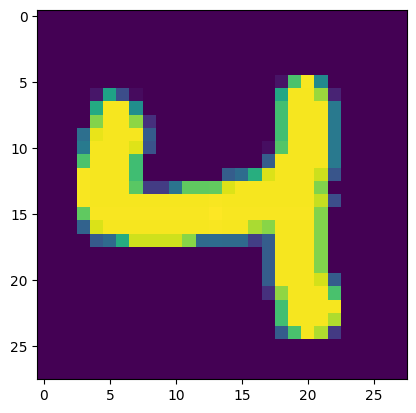

In [11]:
plt.imshow(X_train[:, 9].reshape(28, 28, 1))

In [12]:
len(preds[preds==Y_train])/len(preds)

0.9206341463414635